In [1]:
import pandas as pd
from tqdm import tqdm
from collections import defaultdict
import pickle as pkl

In [7]:
from os import listdir
from os.path import isfile, join

# In this program, we map the PubMed query result filtered only on Clinical trials

#mypath = 'PubMedQueryOnlyClinicalTrialsRelevantSet/'
mypath = 'PubMedQueryAllRelevantSet'
#onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
onlynewfiles = [f for f in listdir(mypath) if isfile(join(mypath, f)) and f[0:3] == 'new']

In [8]:
print(onlynewfiles)

['newcsv-RecommendedAnitiplateletDoses-set.csv', 'newcsv-treatingpeoplealreadyhypertension-set.csv', 'newcsv-postoperativeDelirium-set.csv', 'newcsv-safetreatmentAlzheimerDisease-set.csv', 'newcsv-safetreatmentAsthma-set.csv', 'newcsv-seriousRheumatoidArthritis-set.csv', 'newcsv-serioussleepApnea-set.csv', 'newcsv-TreatingAnemiaIrondeficiencyinCKD-set.csv', 'newcsv-lowbackpainTherapyWorkout-set.csv', 'newcsv-OutcomesofCerebrovascularAccident-set.csv', 'newcsv-managingconstipationinChildren-set.csv', 'newcsv-malnutritionYoungchildren-set.csv', 'newcsv-outofhospitalCardiacArrest-set.csv', 'newcsv-NonvalvularAtrialFibrillation-set.csv', 'newcsv-hypertensionSafeTreatments-set.csv', 'newcsv-HIVinfectiontreatment-set.csv', 'newcsv-HIVinfectionSeronegativity-set.csv', 'newcsv-haemorrhageCure-set.csv', 'newcsv-HypercholesterolemiaSafeTreatment-set.csv', 'newcsv-DietaryTherapyEpilepsies-set.csv', 'newcsv-EarlyParkinsondiseasetreatment-set.csv', 'newcsv-dietaryapproachesObesityTreatment-set.csv'

In [3]:
onetoone_data = pd.read_csv('nct_pmid_citeonetoone_mapping_20thMay2020.csv')
first_hop_ncts = pkl.load(open('FirstHopNctNeighbors_24thMay.p', 'rb'))
second_hop_ncts = pkl.load(open('SecondHopNctNeighbors_24thMay.p', 'rb'))

In [48]:
len(first_hop_ncts.keys())
first_hop_ncts

defaultdict(list,
            {28950719.0: ['NCT02971111'],
             28931617.0: ['NCT03745092', 'NCT02974283'],
             28939546.0: ['NCT02976376'],
             28988183.0: ['NCT02979782'],
             28403865.0: ['NCT02972164'],
             30509206.0: ['NCT02977481'],
             29988004.0: ['NCT02979002'],
             29955731.0: ['NCT02979717'],
             28203475.0: ['NCT02973698'],
             28600694.0: ['NCT02971332'],
             30453950.0: ['NCT02972567'],
             30608597.0: ['NCT03281512'],
             30321257.0: ['NCT03285074'],
             29635500.0: ['NCT03285074'],
             29879942.0: ['NCT03280771'],
             29605498.0: ['NCT01432925'],
             27097163.0: ['NCT01432925'],
             24402594.0: ['NCT01431040'],
             27304433.0: ['NCT01437657'],
             28320635.0: ['NCT01436487'],
             23635614.0: ['NCT02004470', 'NCT01433874'],
             30062716.0: ['NCT01436747'],
             22340260.0: ['N

In [49]:
first_hop_ncts[28320635]

['NCT01436487']

In [50]:
second_hop_ncts

defaultdict(list,
            {'13493614': ['NCT00117845'],
             '4770788': ['NCT00117845'],
             '13387693': ['NCT00117845'],
             '13628564': ['NCT00117845'],
             '14370191': ['NCT00117845'],
             '13626934': ['NCT00117845'],
             '13172181': ['NCT00117845'],
             '4477014': ['NCT00117845'],
             '5890774': ['NCT00117845'],
             '11945412': ['NCT00117845'],
             '5103071': ['NCT00117845'],
             '4429565': ['NCT00117845'],
             '4289777': ['NCT00117845'],
             '16742598': ['NCT00117845'],
             '14775715': ['NCT00117845'],
             '4113870': ['NCT00001512', 'NCT00001572', 'NCT00006184'],
             '4612522': ['NCT00001512', 'NCT00001572', 'NCT00006184'],
             '4110183': ['NCT00001512', 'NCT00001572', 'NCT00006184'],
             '4115135': ['NCT00001512', 'NCT00001572', 'NCT00006184'],
             '4131936': ['NCT00001512', 'NCT00001572', 'NCT00006184'],
   

In [51]:
second_hop_ncts['3299090']

['NCT00001010',
 'NCT00197587',
 'NCT00084136',
 'NCT00001001',
 'NCT00000669',
 'NCT00002276',
 'NCT00618176',
 'NCT00270296']

In [52]:
onetoone_data.columns
direct_ncts = defaultdict(list)

for row_id in tqdm(range(onetoone_data.shape[0])):
    line = onetoone_data.iloc[row_id, 0]
    line = line.replace('\r', '')
    line = line.replace('\n', '')
    direct_ncts[onetoone_data.iloc[row_id, 1]].append(line)

100%|██████████| 64721/64721 [00:01<00:00, 42115.66it/s]


In [53]:
for file in onlyfiles:
    csv_data = pd.read_csv(join(mypath,file))
    print(file, ' ;; ', csv_data.shape)
    rank_list = [i for i in range(csv_data.shape[0])]
    #csv_data['rank'] = rank_list
    nct_onetoone_map_list = list()
    nct_firsthop_map_list = list()
    nct_secondhop_map_list = list()
    
    for row_id in range(csv_data.shape[0]):
        key = csv_data.iloc[row_id, 0]
        
        # direct_ncts is the strongest bond of one-to-one mapping
        if key in direct_ncts.keys():
            ncts = direct_ncts[key]
            if len(ncts) == 1:
                nct_str = ncts[0]
            else:
                nct_str = ';'.join(ncts)
            nct_onetoone_map_list.append(nct_str)
        else:
            nct_onetoone_map_list.append('Not mapped')
        
        # first hop neighbors include one-to-one mapping and references and result-references
        if key in first_hop_ncts.keys():
            ncts = first_hop_ncts[key]
            if len(ncts) == 1:
                nct_str = ncts[0]
            else:
                nct_str = ';'.join(ncts)
            nct_firsthop_map_list.append(nct_str)
        else:
            nct_firsthop_map_list.append('Not mapped')
        
        # second hop neighbors maps a nct id to a Pubmed id, where the PubMed article cited the one-to-one mapped PubMed article the NCT id is mapped to.
        # It needs to be mapped to PMC id which at 9th column of csv_data
        pmc_key1 = csv_data.iloc[row_id, 8]
        pmc_key = str(str(pmc_key1)[3:])
        #print(type(pmc_key))
    
        if pmc_key in second_hop_ncts.keys():
            ncts = second_hop_ncts[pmc_key]
            print(pmc_key,ncts)
            if len(ncts) == 1:
                nct_str = ncts[0]
            else:
                nct_str = ';'.join(ncts)
            nct_secondhop_map_list.append(nct_str)
            #print(nct_str)
        else:
            nct_secondhop_map_list.append('Not mapped')
            #print('Not mapped')
        
    
    csv_data['nct_mapped_onetoone'] = nct_onetoone_map_list
    csv_data['nct_mapped_firsthop'] = nct_firsthop_map_list
    csv_data['nct_mapped_secondhop'] = nct_secondhop_map_list
    
    new_filename = 'new' + file
    csv_data.to_csv(join(mypath, new_filename), index=False)
        
        
    

csv-RecommendedAnitiplateletDoses-set.csv  ;;  (1, 11)
csv-treatingpeoplealreadyhypertension-set.csv  ;;  (200, 11)
csv-postoperativeDelirium-set.csv  ;;  (200, 11)
csv-safetreatmentAlzheimerDisease-set.csv  ;;  (200, 11)
csv-safetreatmentAsthma-set.csv  ;;  (200, 11)
csv-seriousRheumatoidArthritis-set.csv  ;;  (200, 11)
csv-serioussleepApnea-set.csv  ;;  (200, 11)
csv-TreatingAnemiaIrondeficiencyinCKD-set.csv  ;;  (200, 11)
csv-lowbackpainTherapyWorkout-set.csv  ;;  (9, 11)
csv-OutcomesofCerebrovascularAccident-set.csv  ;;  (200, 11)
csv-managingconstipationinChildren-set.csv  ;;  (200, 11)
csv-malnutritionYoungchildren-set.csv  ;;  (200, 11)
csv-outofhospitalCardiacArrest-set.csv  ;;  (200, 11)
csv-NonvalvularAtrialFibrillation-set.csv  ;;  (200, 11)
csv-hypertensionSafeTreatments-set.csv  ;;  (200, 11)
csv-HIVinfectiontreatment-set.csv  ;;  (200, 11)
csv-HIVinfectionSeronegativity-set.csv  ;;  (200, 11)
csv-haemorrhageCure-set.csv  ;;  (200, 11)
csv-HypercholesterolemiaSafeTreatment

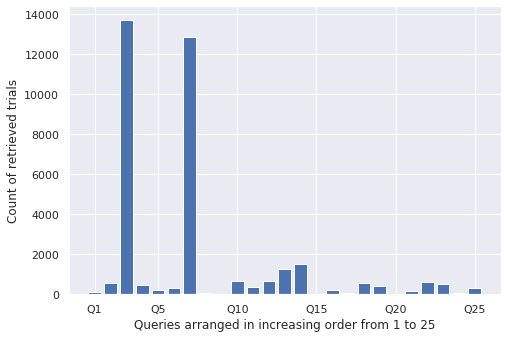

In [8]:
# Now we will make bar plots for the number of retrieved trials for the "Only Clinical Trials" category
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
#queries = ['Dietary Therapy Epilepsies', 'Early Parkinson disease treatment', 'HIV infection Treatment', 'HIV infection seronegativity', 'Hypercholesterolemia safe treatments', 'Nonvalvular atrial fibrillation', 'Outcomes of cerebrovascular accident', 'Treating Anemia, Iron-Deficiency in CKD patients', 'already having Celiac Disease', 'antiretroviral therapy first time', 'constipation safe treatments', 'dietary approaches for obesity treatment', 'haemorrhage cure', 'hypertension safe treatments', 'low back pain therapy workout', 'malnutrition in young children', 'managing constipation in children', 'out of hospital cardiac arrest', 'postoperative delirium', 'recommended anti-platelet doses for treating Coronary artery disease', 'safe treatment for Alzheimer disease', 'safe treatments for asthma', 'serious Rheumatoid arthritis', 'serious sleep apnea', 'treating people already having hypertension']
queries = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25']
retrieved_trials_count = [131, 570, 13711, 451,224, 331, 12882, 50, 8, 682, 351, 642, 1267, 1515, 5, 204, 79, 566, 422, 1, 187, 633, 505, 79, 324]

ax.bar(queries, retrieved_trials_count)
ax.set_xlabel('Queries arranged in increasing order from 1 to 25')
ax.set_ylabel('Count of retrieved trials')
ax.set_xticks([0,4,9, 14, 19, 24])
ax.set_xticklabels(['Q1', 'Q5', 'Q10', 'Q15', 'Q20', 'Q25'])
fig.savefig('plotsandcharts/retrievedTrialperQuery.png', bbox_inches='tight', dpi=150)
plt.show()


In [13]:
'''
#mypath = 'PubMedQueryOnlyClinicalTrialsRelevantSet/'
mypath = 'PubMedQueryAllRelevantSet'
#onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
onlynewfiles = [f for f in listdir(mypath) if isfile(join(mypath, f)) and f[0:3] == 'new']
'''

match_percent_tot = 0.0

for file in onlynewfiles:
    csv_data = pd.read_csv(join(mypath,file))
    print(file, ' ;; ', csv_data.shape)
    
    bool_cnt = 0.0
    for elem in csv_data['nct_mapped_firsthop']:
        if elem != 'Not mapped':
            bool_cnt = bool_cnt + 1.0
            
    match_percent_tot = match_percent_tot + bool_cnt/csv_data.shape[0]
    print('Total entries that had first hop neighbors: ', bool_cnt)
    print('Total retrieved entries (max 200) : ', csv_data.shape[0])
    print('Match percent : ', bool_cnt/csv_data.shape[0])

print("Average over all queries Match percent : ", match_percent_tot/len(onlynewfiles))

newcsv-RecommendedAnitiplateletDoses-set.csv  ;;  (1, 14)
Total entries that had first hop neighbors:  0.0
Total retrieved entries (max 200) :  1
Match percent :  0.0
newcsv-treatingpeoplealreadyhypertension-set.csv  ;;  (200, 14)
Total entries that had first hop neighbors:  7.0
Total retrieved entries (max 200) :  200
Match percent :  0.035
newcsv-postoperativeDelirium-set.csv  ;;  (200, 14)
Total entries that had first hop neighbors:  27.0
Total retrieved entries (max 200) :  200
Match percent :  0.135
newcsv-safetreatmentAlzheimerDisease-set.csv  ;;  (200, 14)
Total entries that had first hop neighbors:  16.0
Total retrieved entries (max 200) :  200
Match percent :  0.08
newcsv-safetreatmentAsthma-set.csv  ;;  (200, 14)
Total entries that had first hop neighbors:  3.0
Total retrieved entries (max 200) :  200
Match percent :  0.015
newcsv-seriousRheumatoidArthritis-set.csv  ;;  (200, 14)
Total entries that had first hop neighbors:  11.0
Total retrieved entries (max 200) :  200
Match 

In [15]:
mypath = 'PubMedQueryOnlyClinicalTrialsRelevantSet/'
onlynewfiles1 = [f for f in listdir(mypath) if isfile(join(mypath, f)) and f[0:3] == 'new']

match_percent_tot1 = 0.0

for file in onlynewfiles1:
    csv_data = pd.read_csv(join(mypath,file))
    print(file, ' ;; ', csv_data.shape)
    
    bool_cnt = 0.0
    for elem in csv_data['nct_mapped_firsthop']:
        if elem != 'Not mapped':
            bool_cnt = bool_cnt + 1.0
            
    match_percent_tot1 = match_percent_tot1 + bool_cnt/csv_data.shape[0]
    print('Total entries that had first hop neighbors: ', bool_cnt)
    print('Total retrieved entries (max 200) : ', csv_data.shape[0])
    print('Match percent : ', bool_cnt/csv_data.shape[0])

print("Average over all queries Match percent : ", match_percent_tot1/len(onlynewfiles))

newcsv-alreadyhavingCeliacDisease-set.csv  ;;  (8, 14)
Total entries that had first hop neighbors:  0.0
Total retrieved entries (max 200) :  8
Match percent :  0.0
newcsv-antiretroviralTherapyFirstTime-set.csv  ;;  (200, 14)
Total entries that had first hop neighbors:  43.0
Total retrieved entries (max 200) :  200
Match percent :  0.215
newcsv-constipatipationSafeTreatments-set.csv  ;;  (200, 14)
Total entries that had first hop neighbors:  46.0
Total retrieved entries (max 200) :  200
Match percent :  0.23
newcsv-dietaryappforObesityTreatment-set.csv  ;;  (200, 14)
Total entries that had first hop neighbors:  62.0
Total retrieved entries (max 200) :  200
Match percent :  0.31
newcsv-DietaryTherapyEpilepsies-set.csv  ;;  (131, 14)
Total entries that had first hop neighbors:  11.0
Total retrieved entries (max 200) :  131
Match percent :  0.08396946564885496
newcsv-haemorrhageCure-set.csv  ;;  (200, 14)
Total entries that had first hop neighbors:  27.0
Total retrieved entries (max 200) :